<a href="https://colab.research.google.com/github/pushkarjain1009/Random-ML-Problems/blob/master/Lab_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Lab Assignment - 1

__Dataset for analysis can be accessed using the given Kaggle link__

[Link to Kaggle Competition](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/overview)

Problems to be solved:

1. Descriptive Analysis of the dataset (Statistical analysis and visualization with explanation)

2. Choose the 10 most important features for predicting house prices.

3. Apply at least 3 prediction models on the selected features and discuss the proposed model's pros and cons for the underlying dataset.


_Solution:_



In [1]:
# importing necessary libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# importing dataset from drive

from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
data = pd.read_csv("/content/drive/My Drive/Lab1/train.csv")
df = pd.DataFrame(data)

In [4]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### Data Information

In [5]:
df.describe()


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
col = df.columns  #getting list of column names

In [7]:
# showing column wise %ge of NaN values they contains 

for i in col:
  print(i,"\t-\t", df[i].isna().mean()*100)


Id 	-	 0.0
MSSubClass 	-	 0.0
MSZoning 	-	 0.0
LotFrontage 	-	 17.73972602739726
LotArea 	-	 0.0
Street 	-	 0.0
Alley 	-	 93.76712328767123
LotShape 	-	 0.0
LandContour 	-	 0.0
Utilities 	-	 0.0
LotConfig 	-	 0.0
LandSlope 	-	 0.0
Neighborhood 	-	 0.0
Condition1 	-	 0.0
Condition2 	-	 0.0
BldgType 	-	 0.0
HouseStyle 	-	 0.0
OverallQual 	-	 0.0
OverallCond 	-	 0.0
YearBuilt 	-	 0.0
YearRemodAdd 	-	 0.0
RoofStyle 	-	 0.0
RoofMatl 	-	 0.0
Exterior1st 	-	 0.0
Exterior2nd 	-	 0.0
MasVnrType 	-	 0.547945205479452
MasVnrArea 	-	 0.547945205479452
ExterQual 	-	 0.0
ExterCond 	-	 0.0
Foundation 	-	 0.0
BsmtQual 	-	 2.5342465753424657
BsmtCond 	-	 2.5342465753424657
BsmtExposure 	-	 2.6027397260273974
BsmtFinType1 	-	 2.5342465753424657
BsmtFinSF1 	-	 0.0
BsmtFinType2 	-	 2.6027397260273974
BsmtFinSF2 	-	 0.0
BsmtUnfSF 	-	 0.0
TotalBsmtSF 	-	 0.0
Heating 	-	 0.0
HeatingQC 	-	 0.0
CentralAir 	-	 0.0
Electrical 	-	 0.0684931506849315
1stFlrSF 	-	 0.0
2ndFlrSF 	-	 0.0
LowQualFinSF 	-	 0.0
GrLivArea

> Since  __Alley__ , __FireplaceQu__ , __PoolQC__, __Fence__, __MiscFeature__ has very significant no of Nan values , so we can drop them for better results 

In [8]:
df = df.drop(["Alley", "FireplaceQu", "PoolQC", "Fence", "MiscFeature"], axis=1)

In [9]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


> Since the given dataset contains both categorical and numerical dataset we have to separate them for further analysis. 

In [10]:
num_df = df.select_dtypes(exclude=['object'])
cat_df= df.drop(num_df, axis=1)

> Now start analysis with numerical data. Main objective is to determine the columns fit for predictions by checking their skewness.


In [11]:
num_df.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000


In [12]:
num_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [13]:
num_df = num_df.drop(["Id"], axis = 1)   #Since Id does not has any role in price prediction of houses

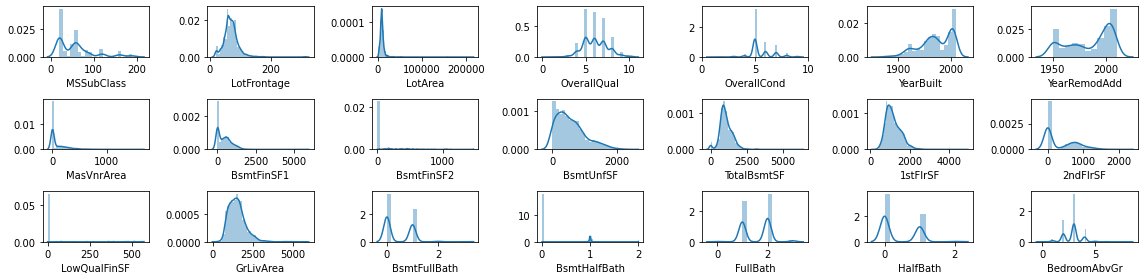

In [14]:
num_col = num_df.columns
index = 0

fig, ax = plt.subplots(nrows = 3, ncols = 7, figsize=(16,4))

for i in range(3):
  for j in range(7):
    sns.distplot(num_df[num_col[index]], ax = ax[i][j])
    index+=1

plt.tight_layout()

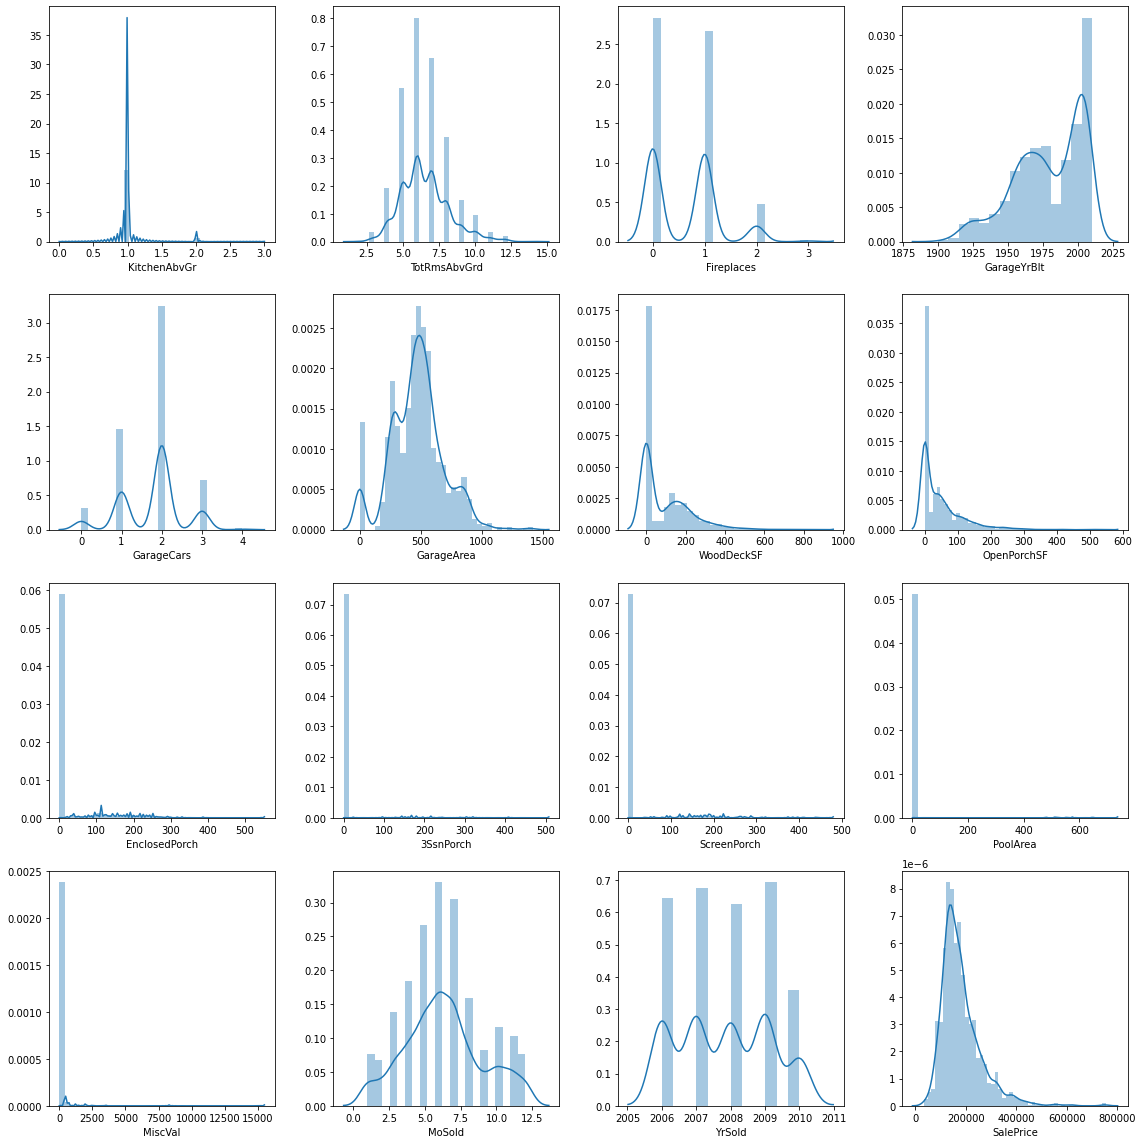

In [15]:
fig, ax = plt.subplots(nrows = 4, ncols = 4, figsize=(16,16))

for i in range(4):
  for j in range(4):
    sns.distplot(num_df[num_col[index]], ax = ax[i][j])
    index+=1

plt.tight_layout()

_Graphs for 37 columns are shown in group of 21 and 16 for simplicity_

> From above graphs we can be pretty sure of several that can be used for prediction purpose since they fairly distributed over the axis whereas some are highly skewed.

> We can further analyse the dataset using Corelation Matrix(visualised using seaborn Heat Map)

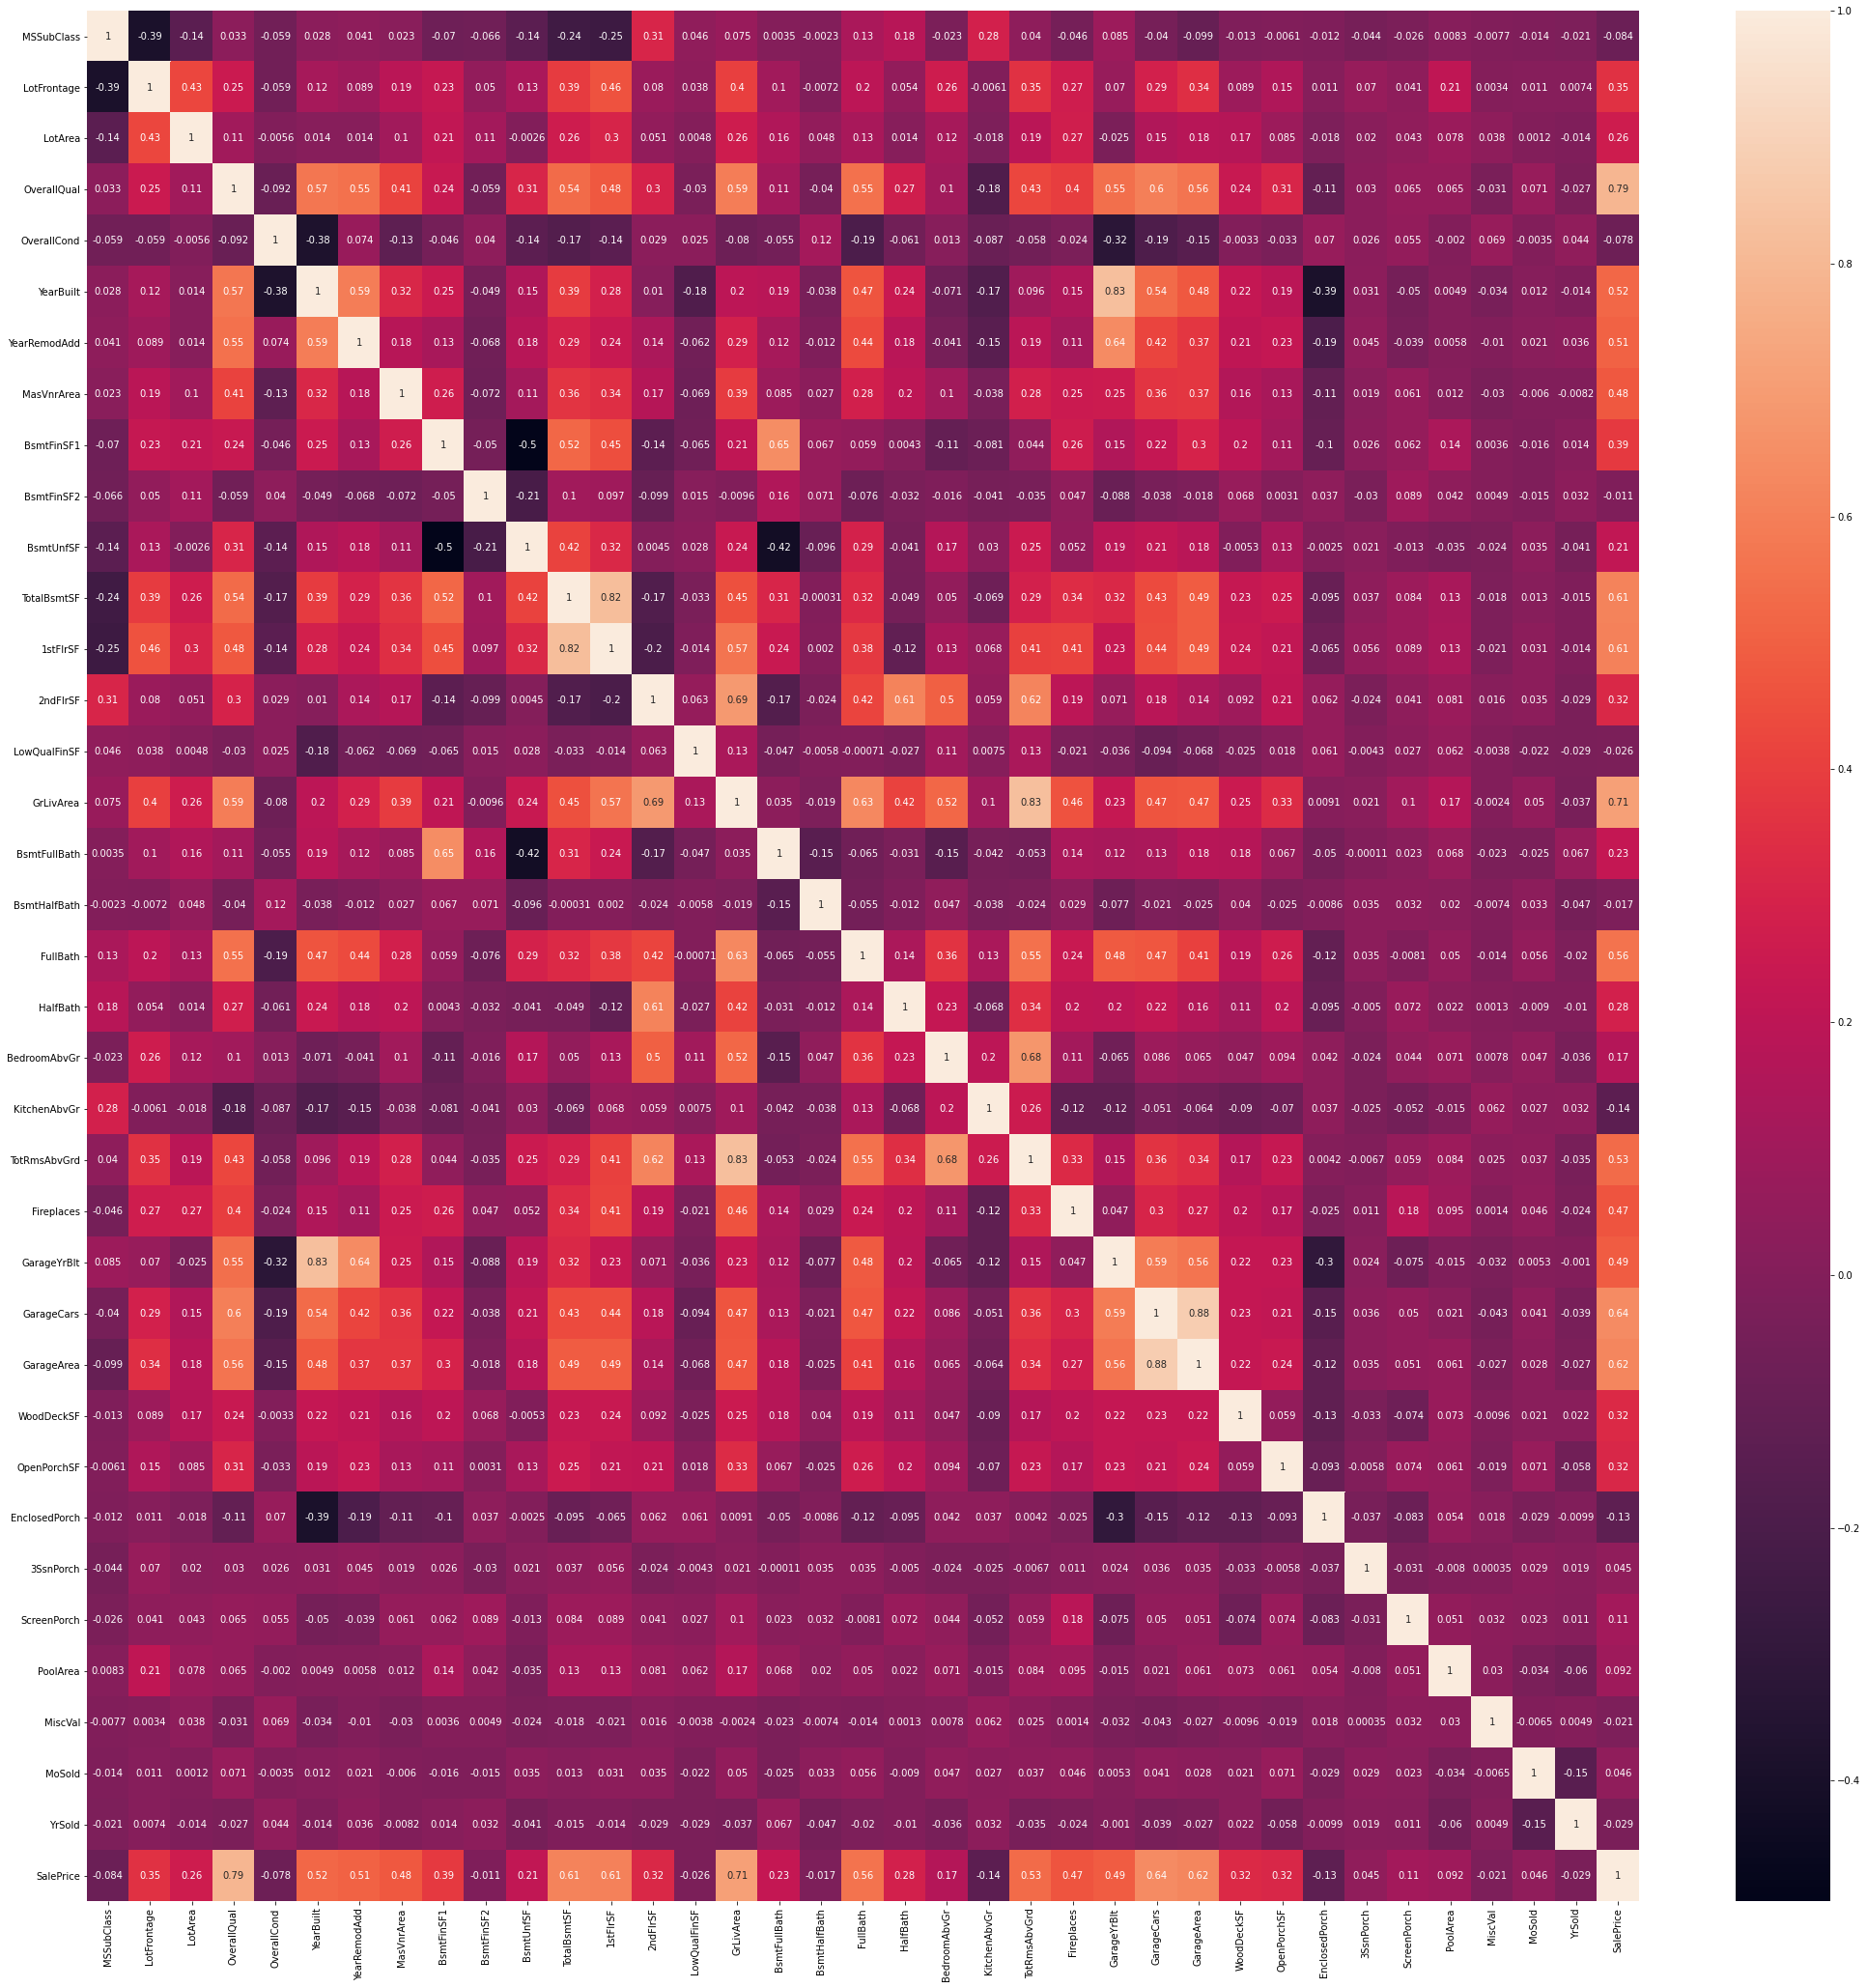

In [16]:
cormap = num_df.corr()
fig, ax = plt.subplots(figsize=(36,36))
sns.heatmap(cormap, annot = True)

In [17]:
# Simple Function to get the name of top most corelated attributes

def get_corelated_col(cor_dat, threshold): 
  # Cor_data to be column along which corelation to be measured 
  #Threshold be the value above wich of corelation to considered
  feature=[]
  value=[]

  for i ,index in enumerate(cor_dat.index):
    if abs(cor_dat[index]) > threshold:
      feature.append(index)
      value.append(cor_dat[index])

  df = pd.DataFrame(data = value, index = feature, columns=['corr value'])
  return df


In [18]:
top_corelated_values = get_corelated_col(cormap['SalePrice'], 0.60)
top_corelated_values

,corr value
OverallQual,0.790982
TotalBsmtSF,0.613581
1stFlrSF,0.605852
GrLivArea,0.708624
GarageCars,0.640409
GarageArea,0.623431
SalePrice,1.000000


> So above mentioned Colums are best fit to use in prediction model

In [19]:
final_num_df = num_df[top_corelated_values.index]
final_num_df.head()

,OverallQual,TotalBsmtSF,1stFlrSF,GrLivArea,GarageCars,GarageArea,SalePrice
0,7,856,856,1710,2,548,208500
1,6,1262,1262,1262,2,460,181500
2,7,920,920,1786,2,608,223500
3,7,756,961,1717,3,642,140000
4,8,1145,1145,2198,3,836,250000


> __Corelation Matrix__ further clarifyies that columns choesen from distribution curve are more apt for performing predictions as compared to rest 

> Now let's analyse the categorical part of dataset.



In [20]:
cat_df.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal


In [21]:
cat_df.describe()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
count,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1452,1460,1460,1460,1423,1423,1422,1423,1422,1460,1460,1460,1459,1460,1460,1379,1379,1379,1379,1460,1460,1460
unique,5,2,4,4,2,5,3,25,9,8,5,8,6,8,15,16,4,4,5,6,4,4,4,6,6,6,5,2,5,4,7,6,3,5,5,3,9,6
top,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,TA,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Attchd,Unf,TA,TA,Y,WD,Normal
freq,1151,1454,925,1311,1459,1052,1382,225,1260,1445,1220,726,1141,1434,515,504,864,906,1282,647,649,1311,953,430,1256,1428,741,1365,1334,735,1360,870,605,1311,1326,1340,1267,1198


> Let's first encode the categorical data into numerical for futher analysis

In [22]:
from sklearn.preprocessing import LabelEncoder

cat_col = cat_df.columns
for i in cat_col:
  enc = LabelEncoder()
  cat_df[i] = enc.fit_transform(cat_df[i].astype('str'))

In [23]:
cat_df.head()


,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,3,1,3,3,0,4,0,5,2,2,0,5,1,1,12,13,1,2,4,2,2,3,3,2,5,1,0,1,4,2,6,1,1,4,4,2,8,4
1,3,1,3,3,0,2,0,24,1,2,0,2,1,1,8,8,2,3,4,1,2,3,1,0,5,1,0,1,4,3,6,1,1,4,4,2,8,4
2,3,1,0,3,0,4,0,5,2,2,0,5,1,1,12,13,1,2,4,2,2,3,2,2,5,1,0,1,4,2,6,1,1,4,4,2,8,4
3,3,1,0,3,0,0,0,6,2,2,0,5,1,1,13,15,2,3,4,0,3,1,3,0,5,1,2,1,4,2,6,5,2,4,4,2,8,0
4,3,1,0,3,0,2,0,15,2,2,0,5,1,1,12,13,1,2,4,2,2,3,0,2,5,1,0,1,4,2,6,1,1,4,4,2,8,4


In [24]:
cat_df['SalePrice'] = df['SalePrice']  # to get coreltion with target attribute which is Sales Price

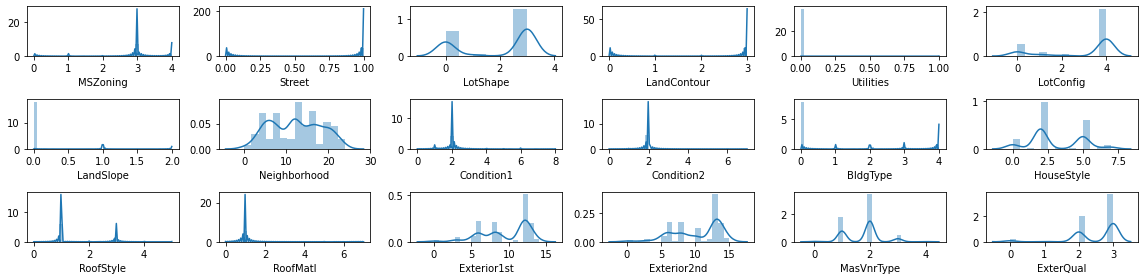

In [25]:
index = 0

fig, ax = plt.subplots(nrows = 3, ncols = 6, figsize=(16,4))

for i in range(3):
  for j in range(6):
    sns.distplot(cat_df[cat_col[index]], ax = ax[i][j])
    index+=1

plt.tight_layout()

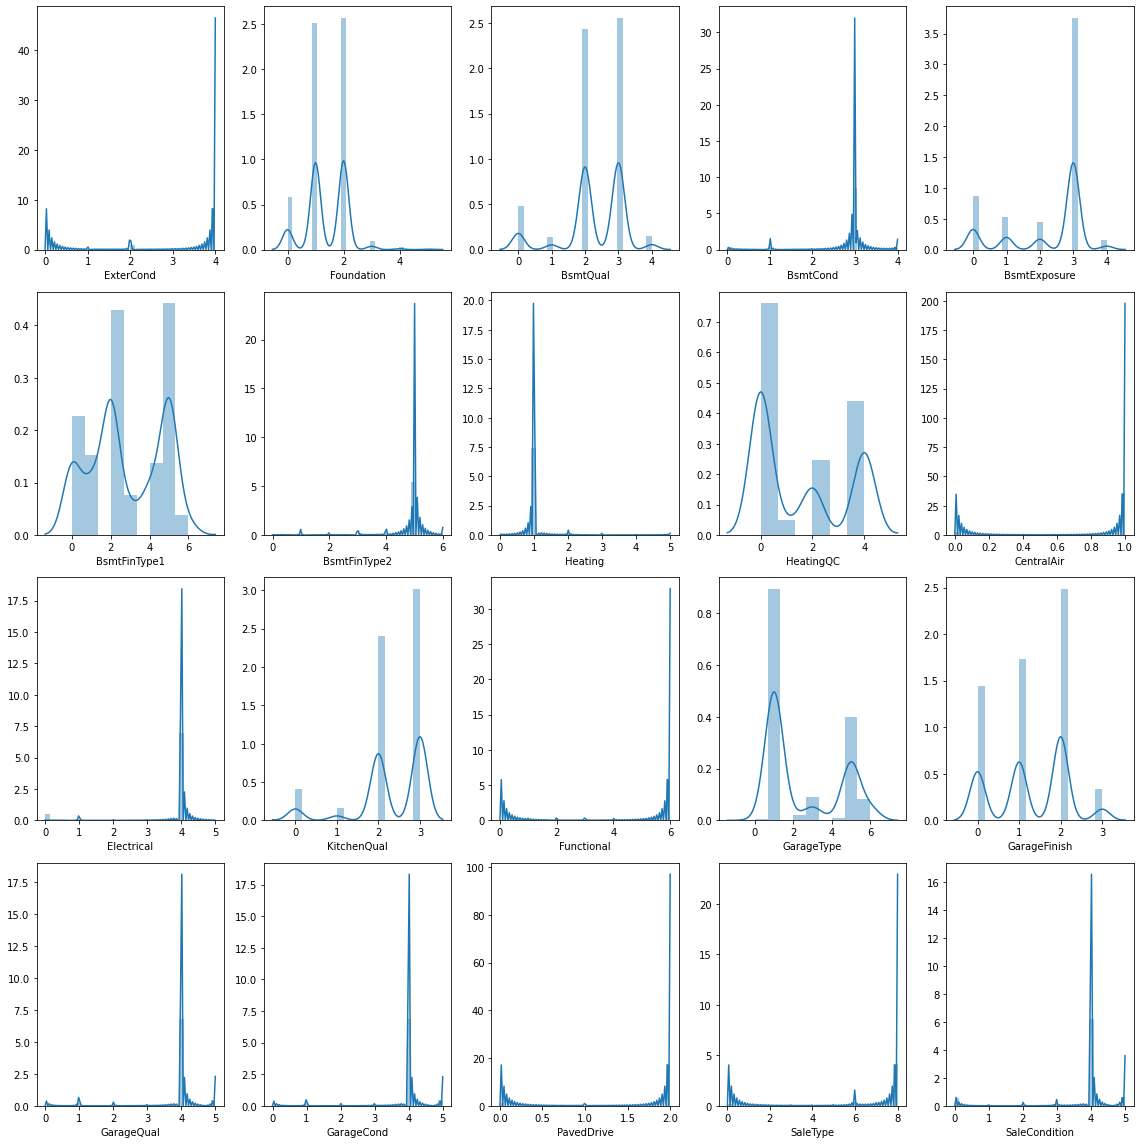

In [26]:
fig, ax = plt.subplots(nrows = 4, ncols = 5, figsize=(16,16))

for i in range(4):
  for j in range(5):
    sns.distplot(cat_df[cat_col[index]], ax = ax[i][j])
    index+=1

plt.tight_layout()

> So from the Distribution Graph of Categorical Dataset we can say that some columns can be for price prediction. Let's get the final names from Corelation Matrix

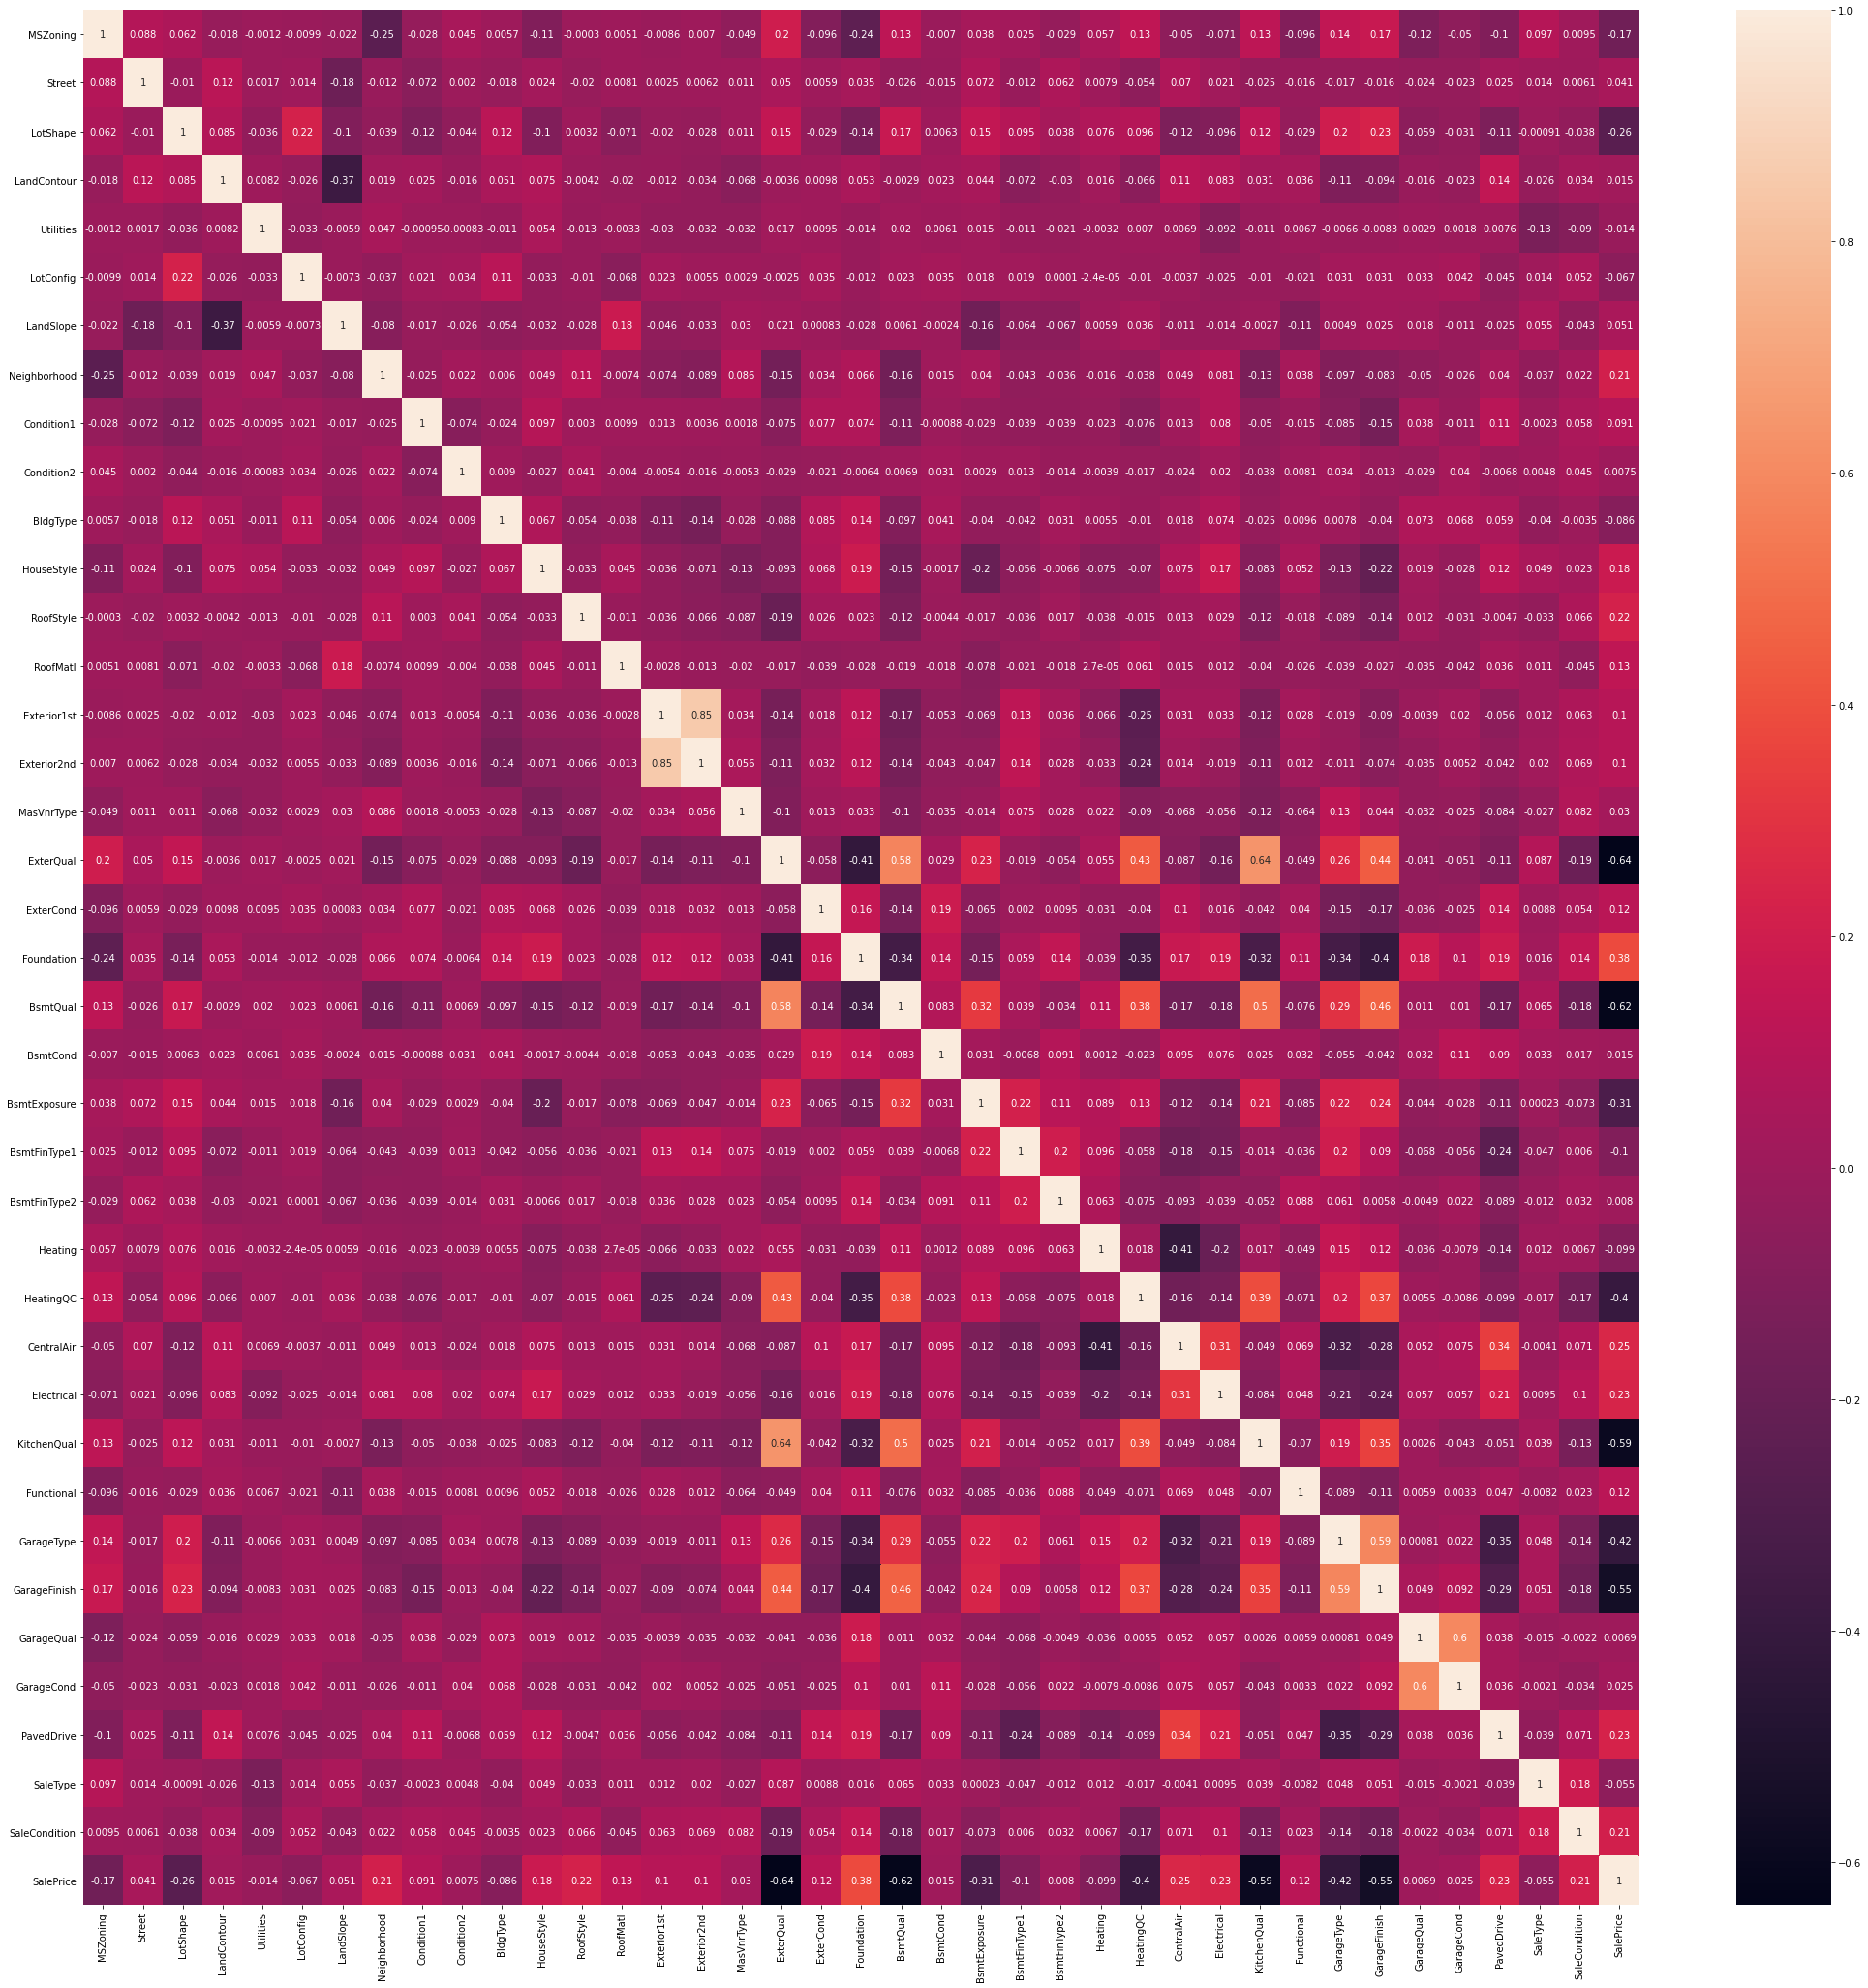

In [27]:
cormat = cat_df.corr()
fig, ax = plt.subplots(figsize=(36,36))
sns.heatmap(cormat, annot = True)

In [28]:
top_corelated_values_cat = get_corelated_col(cormat['SalePrice'], 0.50)
top_corelated_values_cat

,corr value
ExterQual,-0.636884
BsmtQual,-0.620886
KitchenQual,-0.589189
GarageFinish,-0.549247
SalePrice,1.000000


In [29]:
final_cat_df = cat_df[top_corelated_values_cat.index].drop(['SalePrice'], axis=1) #since it was added only to find corelation and will double the attribute whice concation
final_cat_df.head()

,ExterQual,BsmtQual,KitchenQual,GarageFinish
0,2,2,2,1
1,3,2,3,1
2,2,2,2,1
3,3,3,2,2
4,2,2,2,1


In [30]:
# Final selected 10 most favourable features for prediction

final_df = pd.concat([ final_cat_df, final_num_df], axis = 1, sort=False)
final_df.head()

,ExterQual,BsmtQual,KitchenQual,GarageFinish,OverallQual,TotalBsmtSF,1stFlrSF,GrLivArea,GarageCars,GarageArea,SalePrice
0,2,2,2,1,7,856,856,1710,2,548,208500
1,3,2,3,1,6,1262,1262,1262,2,460,181500
2,2,2,2,1,7,920,920,1786,2,608,223500
3,3,3,2,2,7,756,961,1717,3,642,140000
4,2,2,2,1,8,1145,1145,2198,3,836,250000


> So let's make a pairplot to see the corelation final dataset

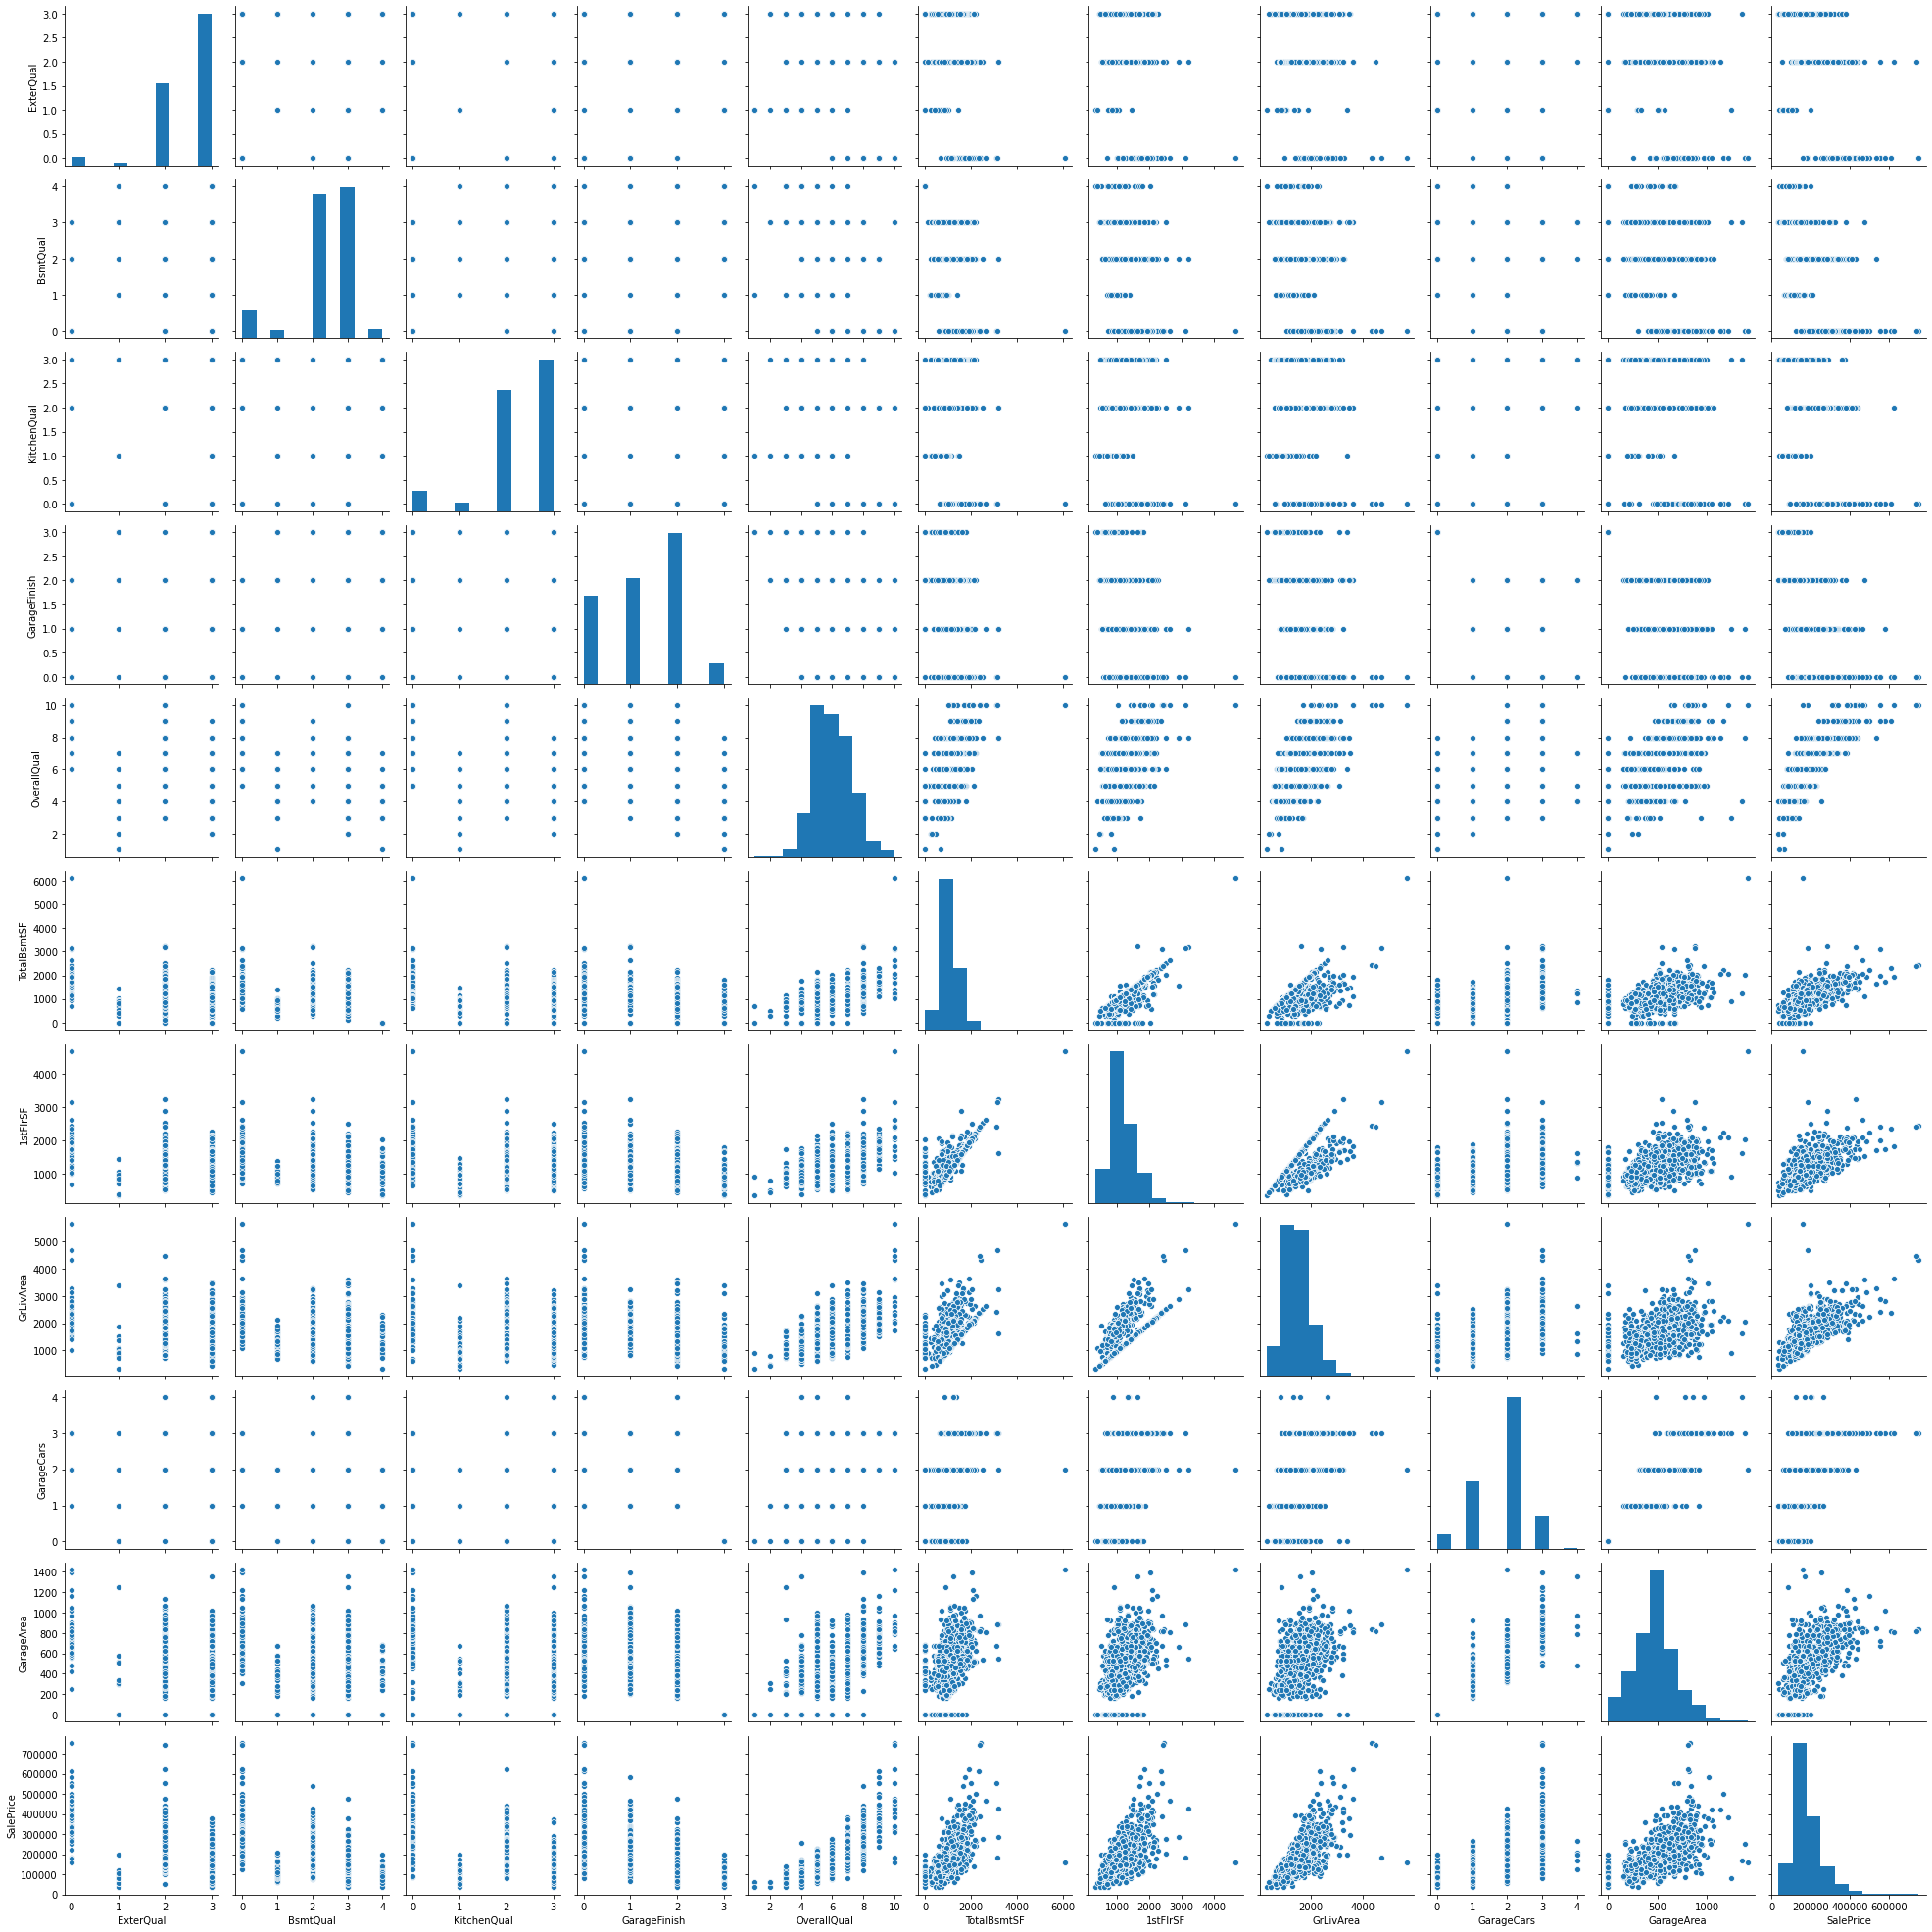

In [31]:
sns.pairplot(final_df)
plt.tight_layout()

In [32]:
for i in final_df.columns:
  print(i,"\t-\t", final_df[i].isna().mean()*100)

ExterQual 	-	 0.0
BsmtQual 	-	 0.0
KitchenQual 	-	 0.0
GarageFinish 	-	 0.0
OverallQual 	-	 0.0
TotalBsmtSF 	-	 0.0
1stFlrSF 	-	 0.0
GrLivArea 	-	 0.0
GarageCars 	-	 0.0
GarageArea 	-	 0.0
SalePrice 	-	 0.0


> Since No columns have NaN values , now we can move towards prediction

In [33]:
X = final_df.drop(['SalePrice'], axis=1)
y = final_df['SalePrice']

> Since range of data in different columns veries significantly we need to scale the independent variable i.e. X. For this we will use _Min-Max Scaling_.


In [34]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X.head()

,ExterQual,BsmtQual,KitchenQual,GarageFinish,OverallQual,TotalBsmtSF,1stFlrSF,GrLivArea,GarageCars,GarageArea
0,0.666667,0.50,0.666667,0.333333,0.666667,0.140098,0.119780,0.259231,0.50,0.386460
1,1.000000,0.50,1.000000,0.333333,0.555556,0.206547,0.212942,0.174830,0.50,0.324401
2,0.666667,0.50,0.666667,0.333333,0.666667,0.150573,0.134465,0.273549,0.50,0.428773
3,1.000000,0.75,0.666667,0.666667,0.666667,0.123732,0.143873,0.260550,0.75,0.452750
4,0.666667,0.50,0.666667,0.333333,0.777778,0.187398,0.186095,0.351168,0.75,0.589563


In [35]:
print(X.shape, y.shape)

(1460, 10) (1460,)


## Prediction Models



#### ___1st Prediction Model: Linear Regression (Multiple Linear Regression)___

> __Linear Regression__ is a statistical method that allows us to summarize and study relationships between continuous (quantitative) variables. The term “linear” in linear regression refers to the fact that the method models data with linear combination of the explanatory/predictor variables (attributes)

In [36]:
#now lets split data in test train pairs

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [37]:
# model training

model_1 = LinearRegression()
model_1.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [38]:
# prediction 

y_pred_1 = model_1.predict(X_test)

pred_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_1})
pred_df.head()

,Actual,Predicted
1402,193879,207639.223813
83,126500,125255.135845
1004,181000,224673.938381
282,207500,208965.503942
433,181000,178763.455117


In [39]:
#Evaluating the Model

from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_1))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_1))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_1)))

Mean Absolute Error: 20476.304672073948
Mean Squared Error: 739488971.7011468
Root Mean Squared Error: 27193.54650833809


> As we can see that the value of root mean squared error is 27193.54650833809, which is slightly lesser than 20% of the mean value. This means that our algorithm was not very accurate but can still make reasonably good predictions.

##### __Pros and Cons__

___Pros___
+ The Linear regression model is the simplest equation using which the relationship between the multiple predictor variables and predicted variable can be expressed.
+ The modeling speed of Linear regression is fast as it does not require complicated calculations and runs predictions fast when the amount of data is large.
+ The ability of Linear regression to determine the relative influence of one or more predictor variables to the predicted value when the predictors are independent of each other is one of the key reasons of the popularity of Linear regression.

___Cons___
+ The Linear regression model is too simplistic to capture real world complexity
+ Linear regression makes strong assumptions that there is Predictor (independent) and Predicted (dependent) variables are linearly related which may not be the case.
+ Outliers can have a large effect on the output, as the Best Fit Line tries to minimize the MSE for the outlier points as well, resulting in a model that is not able to capture the information in the data.




#### ___2nd Prediction Model: SVR (Support Vector Regressor)___

> In the __SVR__ algorithm, we plot each data item as a point in n-dimensional space (where n is number of features you have) with the value of each feature being the value of a particular coordinate. Then, we perform regression by finding the hyper-plane that differentiates the two classes very well.

In [40]:
# model training 

from sklearn.svm import SVR

model_2 = SVR(kernel='rbf')   # Here kernel used is RBF (Radial Basis Function)
model_2.fit(X_train, y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [41]:
# Prediction

y_pred_2 = model_2.predict(X_test)

pred_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_2})
pred_df.head()

,Actual,Predicted
1402,193879,165110.005716
83,126500,164846.088483
1004,181000,165157.094815
282,207500,165108.739251
433,181000,165044.132150


In [42]:
#Evaluating the Model

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_2))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_2))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_2)))

Mean Absolute Error: 51861.67365034425
Mean Squared Error: 5105731779.300366
Root Mean Squared Error: 71454.4034983175


> As we can see that the value of root mean squared error is 71454.4034983175, which is slightly lesser than 50% of the mean value. This means that our algorithm was not accurate and poorly trained and cannot make reasonably good predictions. Errors in prediction of SVR is far more than as Multiple Linear Regression

##### ___Pros and Cons___

__Pros__
+ It works really well with a clear margin of separation
+ It is effective in high dimensional spaces.
+ It is effective in cases where the number of dimensions is greater than the number of samples.
+ It uses a subset of training points in the decision function (called support vectors), so it is also memory efficient.

__Cons__
+ It doesn’t perform well when we have large data set because the required training time is higher
+ It also doesn’t perform very well, when the data set has more noise i.e. target classes are overlapping
+ SVM doesn’t directly provide probability estimates, these are calculated using an expensive five-fold cross-validation. It is included in the related SVR method of Python scikit-learn library.

#### ___3rd Prediction Model: Random Forest___

__Random Forests__ are simply an ensemble of decision trees. The input vector is run through multiple decision trees. For regression, the output value of all the trees is averaged

In [43]:
#model training

from sklearn.ensemble import RandomForestRegressor

model_3 = RandomForestRegressor(n_estimators = 500) # Here n_estimator which means no of descision trees used is 500
model_3.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=500, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [44]:
# Prediction

y_pred_3 = model_3.predict(X_test)

pred_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_3})
pred_df.head()

,Actual,Predicted
1402,193879,197020.448000
83,126500,136095.330667
1004,181000,201218.138000
282,207500,217961.484000
433,181000,181878.180667


In [45]:
#Evaluating the Model

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_3))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_3))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_3)))

Mean Absolute Error: 18314.103082760088
Mean Squared Error: 647354439.6565865
Root Mean Squared Error: 25443.16096039536


> As we can see that the value of root mean squared error is 25443.16096039536, which is slightly greater than 15% of the mean value. This means that our algorithm was not very accurate but can still make reasonably good predictions. But it has given best accuracy in prediction so far as compared to other models. 


##### ___Pros and Cons___

__Pros:__
+ Great at learning complex, highly non-linear relationships. They usually can achieve pretty high performance, better than polynomial regression and often on par with neural networks.
+ Very easy to interpret and understand. Although the final trained model can learn complex relationships, the decision boundaries that are built during training are easy and practical to understand.

__Cons:__
+ Because of the nature of training decision trees they can be prone to major overfitting. A completed decision tree model can be overly-complex and contain unnecessary structure. 
+ Using larger random forest ensembles to achieve higher performance comes with the drawbacks of being slower and requiring more memory.

#### ___4th Prediction Model: Ridge Regression___

> __Ridge__ regression is a variation of linear regression specifically adapted for data that shows heavy multicollinearity. Ridge regression applies shrinking. Ridge regression is well-suited for datasets that have an abundant amount of features which are not independent (collinearity) from one another.

In [46]:
# Model Training

from sklearn.linear_model import RidgeCV

model_4 = RidgeCV()
model_4.fit(X_train, y_train)


RidgeCV(alphas=array([ 0.1,  1. , 10. ]), cv=None, fit_intercept=True,
        gcv_mode=None, normalize=False, scoring=None, store_cv_values=False)

In [47]:
# Prediction

y_pred_4 = model_4.predict(X_test)

pred_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_4})
pred_df.head()

,Actual,Predicted
1402,193879,209511.409413
83,126500,126145.774869
1004,181000,225239.529363
282,207500,210546.665580
433,181000,178294.872429


In [48]:
#Evaluating the Model

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_4))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_4))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_4)))

Mean Absolute Error: 20451.857934135052
Mean Squared Error: 749696892.5424534
Root Mean Squared Error: 27380.59335628893


> As we can see that the value of root mean squared error is 27380.59335628893, which is slightly lesser than 20% of the mean value. Which means this model is not accurate so far.

##### ___Pros and Cons___

__Pros:__
+ Trades variance for bias (i.e. in presence of co-linearity, it is worth to have biased results, in order to lower the variance.)
+ Prevents over fitting

__Cons:__
+ Increases bias
+ Need to select perfect alpha (hyper parameter)
+ Model interpret-ability is low

#### ___5th Prediction Model: Neural Network___

> A __Neural Network__ consists of an interconnected group of nodes called neurons. The input feature variables from the data are passed to these neurons as a multi-variable linear combination, where the values multiplied by each feature variable are known as weights. A neural network can have multiple layers where the output of one layer is passed to the next one in the same way. 

In [49]:
# Model Creation

from keras.models import Sequential
from keras.layers import Dense

def regressor():
  model = Sequential()
  model.add(Dense(20, input_dim=10, kernel_initializer='normal', activation='relu'))
  model.add(Dense(25, kernel_initializer='normal', activation='relu'))
  model.add(Dense(10, kernel_initializer='normal', activation='relu'))
  model.add(Dense(10, kernel_initializer='normal', activation='relu'))
  model.add(Dense(5, kernel_initializer='normal', activation='relu'))
  model.add(Dense(1, kernel_initializer='normal'))
  model.compile(loss='mean_squared_error', optimizer='adam')
  return model

In [50]:
# Model Training

model_5 = regressor()
model_5.fit(X_train, y_train, epochs=1000, validation_split=0.2, verbose=0)

In [51]:
# Prediction

y_pred_5 = model_5.predict(X_test)


In [52]:
pred_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_5.flatten()})
pred_df.head()

,Actual,Predicted
1402,193879,197580.031250
83,126500,128360.039062
1004,181000,216562.093750
282,207500,198620.531250
433,181000,176535.109375


In [53]:
#Evaluating the Model

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_5))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_5))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_5)))

Mean Absolute Error: 18857.628598565923
Mean Squared Error: 665101935.5381972
Root Mean Squared Error: 25789.57028603224


> As we can see that the value of root mean squared error is 25789.57028603224, which is slightly lesser than 20% of the mean value. Which means this model is not accurate so far but better than some of above.

#### ___Pros and Cons___

__Pros:__
+ Since neural networks can have many layers (and thus parameters) with non-linearities, they are very effective at modelling highly complex non-linear relationships.
+ We generally don’t have to worry about the structure of the data at neural networks are very flexible in learning almost any kind of feature variable relationships.
+ Research has consistently shown that simply giving the network more training data, whether totally new or from augmenting the original data set, benefits network performance.

__Cons:__
+ Because of the complexity of these models, they’re not easy to interpret and understand.
+ They can be quite challenging and computationally intensive to train, requiring careful hyper-parameter tuning and setting of the learning rate schedule.
+ They require a lot of data to achieve high performance and are generally outperformed by other ML algorithms in “small data” cases.

In [54]:
##################################################################################################################################################################################

> Since __Random Forest__ appears to be the best model from the 5 models choesen and tested on training dataset, Now lets apply it on test.csv

In [55]:
# Here we ready the Test Data
test_data = pd.read_csv("/content/drive/My Drive/Lab1/test.csv")
test_df = pd.DataFrame(test_data)
test_df["SalePrice"] = df["SalePrice"]
test_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,...,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,208500
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,...,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,181500
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,...,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,223500
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,...,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal,140000
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,...,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal,250000


In [56]:
# here we get the numerical attributes on which model will be trained
test_num_df = test_df[top_corelated_values.index]
test_num_df = test_num_df.drop(["SalePrice"], axis=1)
test_num_df.head()

,OverallQual,TotalBsmtSF,1stFlrSF,GrLivArea,GarageCars,GarageArea
0,5,882.0,896,896,1.0,730.0
1,6,1329.0,1329,1329,1.0,312.0
2,5,928.0,928,1629,2.0,482.0
3,6,926.0,926,1604,2.0,470.0
4,8,1280.0,1280,1280,2.0,506.0


In [57]:
# here we get the categorical attributes on which model will be trained
test_cat_df = test_df[top_corelated_values_cat.index].drop(['SalePrice'], axis=1)
test_cat_df.head()

,ExterQual,BsmtQual,KitchenQual,GarageFinish
0,TA,TA,TA,Unf
1,TA,TA,Gd,Unf
2,TA,Gd,TA,Fin
3,TA,TA,Gd,Fin
4,Gd,Gd,Gd,RFn


In [58]:
# Let's Encode the test categorical dataset also

for i in test_cat_df.columns:
  enc = LabelEncoder()
  test_cat_df[i] = enc.fit_transform(test_cat_df[i].astype('str'))

test_cat_df.head()


,ExterQual,BsmtQual,KitchenQual,GarageFinish
0,3,3,3,2
1,3,3,2,2
2,3,2,3,0
3,3,3,2,0
4,2,2,2,1


In [59]:
final_test_df = pd.concat([ test_cat_df, test_num_df], axis = 1, sort=False)
final_test_df.head()

,ExterQual,BsmtQual,KitchenQual,GarageFinish,OverallQual,TotalBsmtSF,1stFlrSF,GrLivArea,GarageCars,GarageArea
0,3,3,3,2,5,882.0,896,896,1.0,730.0
1,3,3,2,2,6,1329.0,1329,1329,1.0,312.0
2,3,2,3,0,5,928.0,928,1629,2.0,482.0
3,3,3,2,0,6,926.0,926,1604,2.0,470.0
4,2,2,2,1,8,1280.0,1280,1280,2.0,506.0


> Since range of data in different columns veries significantly we need to scale the independent variable. For this we will use _Min-Max Scaling_.
> Since it is a test datset we are going to use same scaler used on training dataset to scale it.


In [60]:
X = pd.DataFrame(scaler.transform(final_test_df), columns=final_test_df.columns)
X.head()

,ExterQual,BsmtQual,KitchenQual,GarageFinish,OverallQual,TotalBsmtSF,1stFlrSF,GrLivArea,GarageCars,GarageArea
0,1.000000,0.75,1.000000,0.666667,0.444444,0.144354,0.128958,0.105878,0.25,0.514810
1,1.000000,0.75,0.666667,0.666667,0.555556,0.217512,0.228316,0.187453,0.25,0.220028
2,1.000000,0.50,1.000000,0.000000,0.444444,0.151882,0.136301,0.243971,0.50,0.339915
3,1.000000,0.75,0.666667,0.000000,0.555556,0.151555,0.135842,0.239261,0.50,0.331453
4,0.666667,0.50,0.666667,0.333333,0.777778,0.209493,0.217072,0.178222,0.50,0.356841


In [61]:
#NaN values check
for i in X.columns:
  print(i,"\t-\t", X[i].isna().mean()*100)

ExterQual 	-	 0.0
BsmtQual 	-	 0.0
KitchenQual 	-	 0.0
GarageFinish 	-	 0.0
OverallQual 	-	 0.0
TotalBsmtSF 	-	 0.06854009595613435
1stFlrSF 	-	 0.0
GrLivArea 	-	 0.0
GarageCars 	-	 0.06854009595613435
GarageArea 	-	 0.06854009595613435


> 3 columns has NaN values.

In [62]:

X = X.fillna(0)

#NaN values check
for i in X.columns:
  print(i,"\t-\t", X[i].isna().mean()*100)

ExterQual 	-	 0.0
BsmtQual 	-	 0.0
KitchenQual 	-	 0.0
GarageFinish 	-	 0.0
OverallQual 	-	 0.0
TotalBsmtSF 	-	 0.0
1stFlrSF 	-	 0.0
GrLivArea 	-	 0.0
GarageCars 	-	 0.0
GarageArea 	-	 0.0


> Now all the NaN values are fixed , Lets Move further

In [63]:
# Prediction

Y_Pred = model_3.predict(X)

In [64]:
final_test_df['Sale_Price'] = Y_Pred
final_test_df.head()

,ExterQual,BsmtQual,KitchenQual,GarageFinish,OverallQual,TotalBsmtSF,1stFlrSF,GrLivArea,GarageCars,GarageArea,Sale_Price
0,3,3,3,2,5,882.0,896,896,1.0,730.0,132934.732000
1,3,3,2,2,6,1329.0,1329,1329,1.0,312.0,153489.920000
2,3,2,3,0,5,928.0,928,1629,2.0,482.0,169400.110000
3,3,3,2,0,6,926.0,926,1604,2.0,470.0,180452.330667
4,2,2,2,1,8,1280.0,1280,1280,2.0,506.0,216833.332000


In [65]:
final_test_df.to_csv('/content/drive/My Drive/Lab1/predicted.csv', index=False)